In [424]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import math

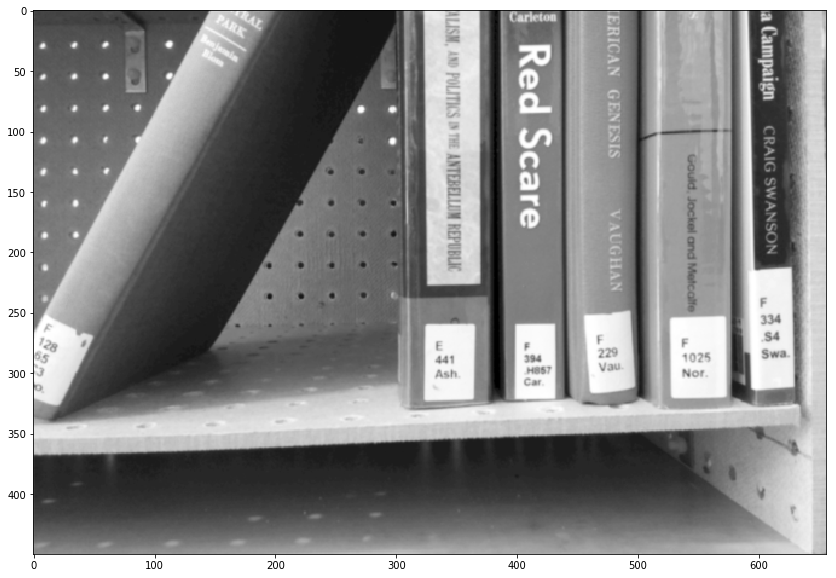

In [425]:
cimg = cv.imread('pictures/books13.png')
cimg= cv.pyrDown(cimg, cimg)
img = cv.imread('pictures/books13.png', 0)
img = cv.pyrDown(img, img)  # Downsample Image
plt.figure(figsize=(15,10))
plt.imshow(img, cmap='gray')
plt.show()

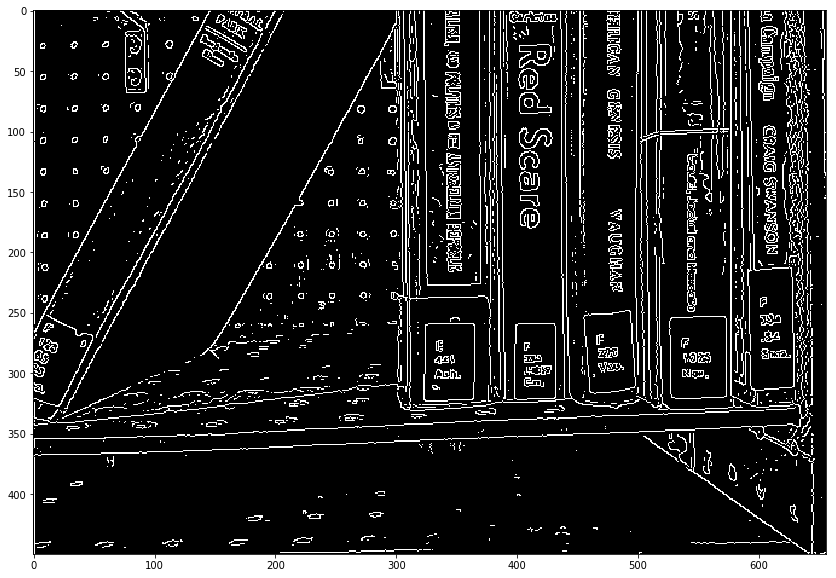

In [426]:
# Apply Canny Edge Detection
edges = cv.Canny(img, 50, 50)
plt.figure(figsize=(15,10))
plt.imshow(edges, cmap='gray')
plt.show()

In [427]:
lines = cv.HoughLines(image=edges, rho=1, theta=np.pi / 180, threshold=150)

In [428]:
cdst = cv.cvtColor(edges, cv.COLOR_GRAY2BGR)
if lines is not None:
        for i in range(0, len(lines)):
            rho = lines[i][0][0]
            theta = lines[i][0][1]
            a = math.cos(theta)
            b = math.sin(theta)
            x0 = a * rho
            y0 = b * rho
            
            # Display only vertical lines
            if (abs(theta) < 0.5) or (abs(theta) > 3):
                pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
                pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
                cv.line(cimg, pt1, pt2, (255,0,0), 2, cv.LINE_AA)

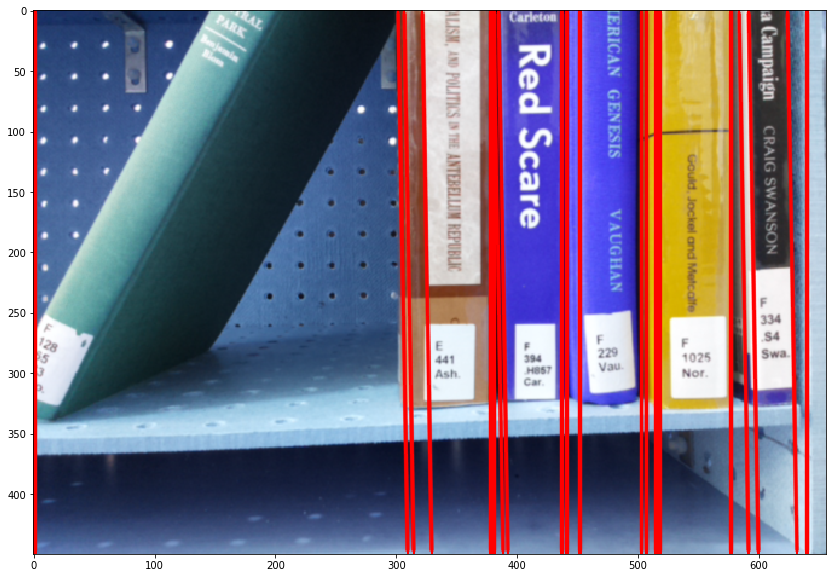

In [429]:
plt.figure(figsize=(15,10))
plt.imshow(cimg, cmap='gray')
plt.show()